![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 7: Erros do polinômio interpolador

## Questão 1: os métodos

Escreva uma função que retorna os coeficientes do polinômio interpolador,
dadas duas listas (ou `np.array`s) para $x_i$ e $y_i$.

Use esta função para criar uma outra, que retorna uma função
"naturalmente" vetorizada (ou seja, sem usar `np.vectorize`)
que calcula esse polinômio interpolador.

In [2]:
def lagrange_coefs(xs,ys):
    """ 
    Coeficientes (em ordem crescente) do polinômio interpolador dos pontos (x_i, y_i).
    """
    assert(len(xs) == len(ys))
    M = np.vander(xs)
    coefs = np.linalg.solve(M,ys)
    return np.flip(coefs)

def lagrange(xs,ys):
    """ 
    Retorna uma função que calcula polinômio interpolador de Lagrange dos pontos (x_i, y_i). 
    """
    coefs = lagrange_coefs(xs,ys)
    def pol(x):
        result = 0
        for i in coefs:
            grau = np.where(np.isclose(coefs, i))[0][0]
            result += x**(grau) * i
        return result
    return pol

In [3]:
c = lagrange_coefs([1,2,3], [4,5,7])
assert np.allclose(c, [4, -1/2, 1/2], atol=1e-14, rtol=1e-14)

In [4]:
p = lagrange([1,2,3], [4,5,7])
assert np.isclose(p(0), 4, atol=1e-14, rtol=1e-14)
assert np.isclose(p(1/2), 3.875, atol=1e-14, rtol=1e-14)

In [5]:
c = lagrange_coefs([1,-1,2,-2], [1, 2, 3, 4])
assert np.allclose(c*12, [10, -7, 8, 1])

In [6]:
p = lagrange([1,-1,2,-2], [1, 2, 3, 4])
assert np.isclose(p(5.1), 26.252583333333333, atol=1e-14, rtol=1e-14)

## Questão 2: Calculando erros

Dadas duas funções, $f$ e $g$, podemos definir o erro entre elas num intervalo $[a,b]$ como
- a integral do valor absoluto da diferença
- a raiz quadrada da integral do quadrado da diferença
- o máximo do valor absoluto da diferença

No computador, vamos aproximar estas medidas, calculando a diferença em alguma discretização do intervalo,
e depois tomando o máximo / soma dos erros.
Vamos usar o "método do ponto médio" para as integrais e, por analogia,
os mesmos pontos para o máximo.

In [7]:
def erro1(f, g, a, b, n=100):
    l, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    mids = l + h/2
    erro = abs(f(mids) - g(mids))
    return np.sum(erro) * h

In [8]:
assert np.isclose(erro1(np.sin, np.cos, 0, np.pi, n=250), 2.8283899040391645)

In [9]:
assert np.isclose(erro1(np.exp, np.cos, -np.pi, np.pi), 23.565960230071205)

In [10]:
def erro2(f, g, a, b, n=100):
    l, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    mids = l + h/2
    erro = (f(mids) - g(mids)) ** 2
    return (np.sum(erro) * h) ** (1/2)

In [11]:
assert np.isclose(erro2(np.sin, np.cos, 0, np.pi), np.sqrt(np.pi))
assert np.isclose(erro2(np.exp, np.cos, -np.pi, np.pi, n=200), 17.14462097595834)

In [12]:
def erromax(f, g, a, b, n=100):
    l, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    mids = l + h/2
    erro = abs(f(mids) - g(mids))
    return max(erro)

In [13]:
assert np.isclose(erromax(np.sin, np.cos, 0, np.pi/2), 0.9921152567560784)
assert np.isclose(erromax(np.exp, np.cos, -np.pi, np.pi, n=200), 23.779916094373814)

## Questão 3: Gráficos

Faça o gráfico da função $\sin(x^2)$, e também do polinômio interpolador de grau 3,
no intervalo $[0, \sqrt{2\pi}]$.

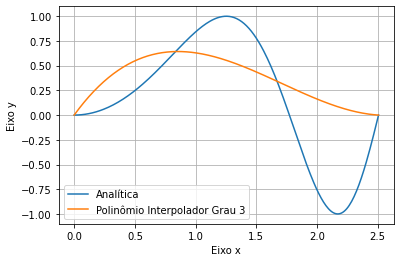

In [14]:
def f(x): return np.sin(x**2)

xs = np.linspace(0, (np.pi*2)**(1/2), num=250)
ys = f(xs)
a, b = 0, (np.pi*2)**(1/2)

ptos_x_inter = [a, b*(1/3), b*(2/3), b]
ptos_y_inter = f(np.array(ptos_x_inter))
pol = lagrange(ptos_x_inter, ptos_y_inter)
ys_pol = pol(xs)

plt.plot(xs, ys, label='Analítica')
plt.plot(xs, ys_pol, label='Polinômio Interpolador Grau 3')
plt.grid()
plt.legend()
plt.xlabel('Eixo x')
plt.ylabel('Eixo y');

Agora, faça o gráfico da diferença (sem valor absoluto) entre a função e o polinômio interpolador

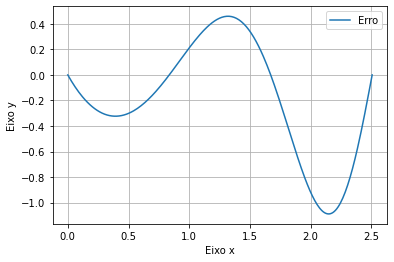

In [15]:
erro = ys - ys_pol

plt.plot(xs, erro, label='Erro')
plt.grid()
plt.legend()
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
ax = plt.gca();

In [16]:
assert len(ax.lines) == 1
assert ax.get_title != ""

ys = ax.lines[0].get_ydata()
assert min(ys) < -1
assert max(ys) > 0.4

Repita para o polinômio de grau 7 (que tem o dobro de coeficientes).

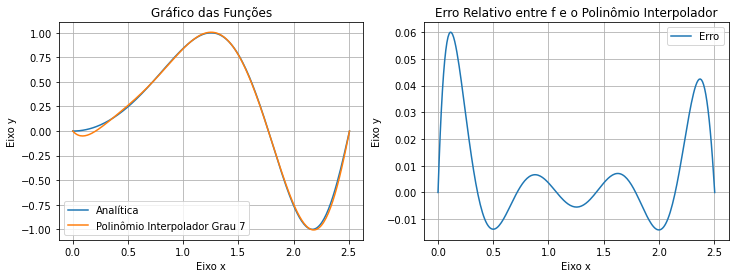

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
ax1, ax2 = axs

xs = np.linspace(0, (np.pi*2)**(1/2), num=250)
ys = f(xs)
a, b = 0, (np.pi*2)**(1/2)

ptos_x_inter = [a, b*(1/7), b*(2/7), b*(3/7), b*(4/7), b*(5/7), b*(6/7), b]
ptos_y_inter = f(np.array(ptos_x_inter))
pol = lagrange(ptos_x_inter, ptos_y_inter)
ys_pol = pol(xs)
erro = ys - ys_pol

ax1.plot(xs, ys, label='Analítica')
ax1.plot(xs, ys_pol, label='Polinômio Interpolador Grau 7')
ax1.grid()
ax1.legend()
ax1.title.set_text('Gráfico das Funções')
ax1.set_xlabel('Eixo x')
ax1.set_ylabel('Eixo y')

ax2.plot(xs, erro, label='Erro')
ax2.grid()
ax2.legend()
ax2.title.set_text('Erro Relativo entre f e o Polinômio Interpolador')
ax2.set_xlabel('Eixo x')
ax2.set_ylabel('Eixo y');

In [18]:
assert len(ax1.lines) == 2
assert len(ax1.legend().texts) == 2
assert ax1.title.get_text() != ""

In [19]:
assert len(ax2.lines) == 1
assert ax2.title.get_text() != ""

ys = ax2.lines[0].get_ydata()
assert np.isclose(max(ys), 0.06, atol=1e-4)
assert np.isclose(min(ys), -0.0140140, atol=1e-4)

O erro máximo é fácil de ver pelo gráfico.
Use as funções `erro1` e `erro2` para comparar, também, os erros "ao longo do intervalo inteiro".

In [20]:
erro_1 = erro1(f, pol, a, b)
erro_2 = erro2(f, pol, a, b)

print(f"A integral do valor absoluto das diferenças no intervalo dado é: {erro_1} ")
print(f"A raiz quadrada da integral, do quadrado das diferenças no intervalo dado é: {erro_2} ")
print(f"O erro máximo é facil ver pelo gráfico acima, que é APROXIMADAMENTE: 0.06")

A integral do valor absoluto das diferenças no intervalo dado é: 0.03284907265842159 
A raiz quadrada da integral, do quadrado das diferenças no intervalo dado é: 0.0314367282118781 
O erro máximo é facil ver pelo gráfico acima, que é APROXIMADAMENTE: 0.06


## Questão 4: Erros e subdivisões

Para o grau $d$ do polinômio interpolador variando entre $3$ e $30$,
faça o gráfico do máximo do erro entre o polinômio interpolador e a função $\sin(x^2)$,
no mesmo intervalo $[0, \sqrt{2\pi}]$.

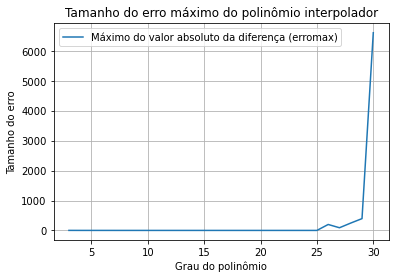

In [21]:
ds = np.arange(3,30+1)
max_errs = []
a, b = 0, (np.pi*2)**(1/2)

for d in ds:
    ptos_x_inter = []
    for i in range(d+1):
        ptos_x_inter.append(b*(i/d))
    array_x = np.array(ptos_x_inter)
    ptos_y_inter = f(array_x)
    pol = lagrange(array_x, ptos_y_inter)
    erro = erromax(f, pol, a, b)
    max_errs.append(erro)

plt.plot(ds, max_errs, label='Máximo do valor absoluto da diferença (erromax)') 
plt.grid()
plt.legend()
plt.title('Tamanho do erro máximo do polinômio interpolador')
plt.xlabel('Grau do polinômio')
plt.ylabel('Tamanho do erro')
ax = plt.gca();

In [22]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Como o erro decai quando aumentamos $n$?

Inicialmente ao passo que n aumenta, o erro máximo (erromax) diminui (pode-se visualizar melhor utilizando ds entre 0 e 10). Conforme n atinge um certo tamanho (no caso estudado seria n>25), o erro máximo começa a crescer extremamente rápido ao passo que n aumenta mais ainda, atingindo valores enormes e com isso perdendo totalmente a precisão.

Agora, repita para os 3 erros.

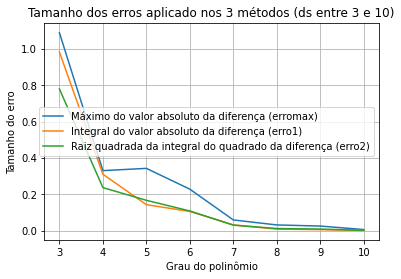

In [23]:
ds = np.arange(3,10+1)
errs_max = []
errs_1   = []
errs_2   = []

for d in ds:
    ptos_x_inter = []
    for i in range(d+1):
        ptos_x_inter.append(b*(i/d))
    array_x = np.array(ptos_x_inter)
    ptos_y_inter = f(array_x)
    pol = lagrange(array_x, ptos_y_inter)
    erro_max = erromax(f, pol, a, b)
    erro_1 = erro1(f, pol, a, b)
    erro_2 = erro2(f, pol, a, b)
    errs_max.append(erro_max)
    errs_1.append(erro_1)
    errs_2.append(erro_2)

plt.plot(ds, errs_max, label='Máximo do valor absoluto da diferença (erromax)') 
plt.plot(ds, errs_1, label='Integral do valor absoluto da diferença (erro1)')
plt.plot(ds, errs_2, label='Raiz quadrada da integral do quadrado da diferença (erro2)')
plt.grid()
plt.legend()
plt.title('Tamanho dos erros aplicado nos 3 métodos (ds entre 3 e 10)')
plt.xlabel('Grau do polinômio')
plt.ylabel('Tamanho do erro')
ax = plt.gca();

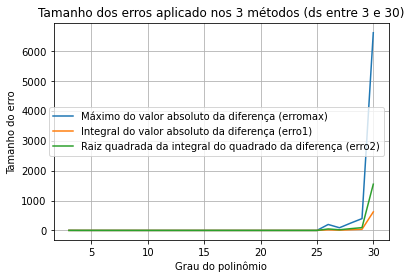

In [24]:
ds = np.arange(3,30+1)
errs_max = []
errs_1   = []
errs_2   = []

for d in ds:
    ptos_x_inter = []
    for i in range(d+1):
        ptos_x_inter.append(b*(i/d))
    array_x = np.array(ptos_x_inter)
    ptos_y_inter = f(array_x)
    pol = lagrange(array_x, ptos_y_inter)
    erro_max = erromax(f, pol, a, b)
    erro_1 = erro1(f, pol, a, b)
    erro_2 = erro2(f, pol, a, b)
    errs_max.append(erro_max)
    errs_1.append(erro_1)
    errs_2.append(erro_2)

plt.plot(ds, errs_max, label='Máximo do valor absoluto da diferença (erromax)') 
plt.plot(ds, errs_1, label='Integral do valor absoluto da diferença (erro1)')
plt.plot(ds, errs_2, label='Raiz quadrada da integral do quadrado da diferença (erro2)')
plt.grid()
plt.legend()
plt.title('Tamanho dos erros aplicado nos 3 métodos (ds entre 3 e 30)')
plt.xlabel('Grau do polinômio')
plt.ylabel('Tamanho do erro')
ax = plt.gca();

In [25]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.get_title() != ""

O que você observa?  Todos os erros decaem da mesma forma?

Novamente, podemos observar melhor o decaimento do erro usando ds entre 3 e 10. Observando então o gráfico com o ds entre 3 e 10 percebe-se que, inicialmente o erro com o método da raiz quadrada (erro2) decai UM POUCO mais rápido que o método da integral do valor absoluto (erro1), e como esperado o método do máximo do erro (erromax) é o de menor precisão, se mantendo sempre acima dos outros métodos.

Ao passo que n continua aumentando, chega um momento que o erro começa a aumentar de forma bem rápida (como dito antes, n>25), a partir de então podemos observar o comportamento de cada método nessa situação. Como já esperado, o erromax é o que mais aumenta (devido ao erro nas extremidades do intervalo), já o erro2 (que inicialmente era quem possuia a menor das diferenças na maioria dos graus testados) agora começa a possuir uma diferença MAIOR que a do erro1.